In [46]:
import pandas as pd
import numpy as np
import os
import IPython.display as ipd
import librosa   #for audio dataset analysis
#import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
audio_dataset_path = 'Data/genres_original'
df = pd.read_csv("Data/features_30_sec.csv")

In [48]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [49]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type = 'kaiser_fast')  #return normalise audio and sample raate
    mfccs_features = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc = 40)  #returns 40 features which have highest information
    mfccs_scaled_features = np.mean(mfccs_features.T, axis = 0)  #scaling down values
    
    return mfccs_scaled_features

In [50]:
from tqdm import tqdm   #iterator function
# Now we iterate through every audio file and extract features
# using Mel Frequency Cepstral coefficients

extracted_features = []
for index_num, row in tqdm(df.iterrows()):   #traversing rowwise in dataset and assigning labels of the following genre
    try:
        final_class_labels = row["label"]
        file_name = os.path.join(os.path.abspath(audio_dataset_path), final_class_labels+'/', str(row["filename"]))
        data = features_extractor(file_name)
        extracted_features.append([data, final_class_labels])
    except Exception as e:
        print( f"Error: {e}")
        continue;


553it [00:36, 13.76it/s]C:\Users\SHUBHAM GARGE\AppData\Roaming\Python\Python39\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
557it [00:36, 14.33it/s]

Error: 


1000it [01:09, 14.39it/s]


In [51]:
extracted_features_df = pd.DataFrame(extracted_features, columns = [ 'feature', 'class'])  #creating dataframe
extracted_features_df.head()

,feature,class
0,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues
1,"[-207.52383, 123.98514, 8.947019, 35.86715, 2....",blues
2,"[-90.757164, 140.44087, -29.084547, 31.686691,...",blues
3,"[-199.57513, 150.0861, 5.663404, 26.855282, 1....",blues
4,"[-160.35417, 126.20948, -35.581394, 22.139256,...",blues


In [52]:
extracted_features_df['class'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
metal        100
pop          100
reggae       100
rock         100
jazz          99
Name: class, dtype: int64

#### Splitting dataset into dependent and independent dataset

In [53]:
X = np.array( extracted_features_df['feature'].tolist()) #preparing it to send it into model
Y = np.array( extracted_features_df['class'].tolist())

In [54]:
X.shape

(999, 40)

In [55]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = to_categorical(le.fit_transform(Y))

In [56]:
Y.shape

(999, 10)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [58]:
X_train

array([[ 2.6653410e+01,  7.9789711e+01, -5.2055866e+01, ...,
        -1.4430333e+00, -1.2734197e+00, -5.9081392e+00],
       [-1.4495711e+02,  1.1846496e+02,  2.0525068e+01, ...,
         1.8998559e+00, -1.8821739e+00, -1.8517891e+00],
       [-6.6108925e+01,  9.7883812e+01, -1.8831675e+01, ...,
        -1.2424636e+00, -6.3691193e-01, -1.3383397e+00],
       ...,
       [-7.7426697e+01,  1.3087869e+02, -2.3275221e+01, ...,
        -4.2062173e+00, -3.5183537e+00,  2.6050329e+00],
       [-1.9040649e+02,  1.2951292e+02, -7.8296251e+00, ...,
        -2.2419317e+00, -3.9879441e+00, -1.9877437e+00],
       [-4.6609550e+01,  8.6802017e+01, -3.4776672e+01, ...,
         1.4676020e-01,  9.2151529e-01, -8.7239444e-01]], dtype=float32)

In [59]:
print( str(X_train.shape) + " " + str(X_test.shape) + " " +  str(Y_train.shape) + " " + str(Y_test.shape))

(799, 40) (200, 40) (799, 10) (200, 10)


In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [61]:
num_labels = Y.shape[1]

In [62]:
model = Sequential()   #creating nureal network
model.add(Dense(1024, input_shape = (40,), activation = 'relu') )
model.add(Dropout(0.3))
model.add(Dense(512, activation = 'relu') )
model.add(Dropout(0.3))
model.add(Dense(256, activation = 'relu') )
model.add(Dropout(0.3))
model.add(Dense(128, activation = 'relu') )
model.add(Dropout(0.3))
model.add(Dense(128, activation = 'relu') )
model.add(Dropout(0.3))
model.add(Dense(512, activation = 'relu') )

model.add(Dropout(0.3))


#final layer
model.add(Dense(num_labels, activation = 'softmax') )


In [63]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 1024)              41984     
                                                                 
 dropout_29 (Dropout)        (None, 1024)              0         
                                                                 
 dense_34 (Dense)            (None, 512)               524800    
                                                                 
 dropout_30 (Dropout)        (None, 512)               0         
                                                                 
 dense_35 (Dense)            (None, 256)               131328    
                                                                 
 dropout_31 (Dropout)        (None, 256)               0         
                                                                 
 dense_36 (Dense)            (None, 128)              

In [64]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [65]:
import time
t = time.localtime()
current_time = time.strftime( "%H:%M:%S:", t)

In [66]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 150
num_batch_size = 32

#checkpointer = ModelCheckpoint(filepath=f'saved_models/audio_classification_{current_time}.hdf5', 
                               #verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit(X_train, Y_train, batch_size=num_batch_size, epochs = num_epochs, validation_data=(X_test, Y_test), verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/150
25/25 [==============================] - 1s 19ms/step - loss: 3.3010 - accuracy: 0.1026 - val_loss: 2.2751 - val_accuracy: 0.0750
Epoch 2/150
25/25 [==============================] - 0s 10ms/step - loss: 2.3254 - accuracy: 0.1640 - val_loss: 2.1454 - val_accuracy: 0.2100
Epoch 3/150
25/25 [==============================] - 0s 11ms/step - loss: 2.2011 - accuracy: 0.2053 - val_loss: 2.0724 - val_accuracy: 0.2350
Epoch 4/150
25/25 [==============================] - 0s 11ms/step - loss: 2.0903 - accuracy: 0.2290 - val_loss: 2.0101 - val_accuracy: 0.2800
Epoch 5/150
25/25 [==============================] - 0s 10ms/step - loss: 2.0867 - accuracy: 0.2365 - val_loss: 1.9414 - val_accuracy: 0.2500
Epoch 6/150
25/25 [==============================] - 0s 10ms/step - loss: 1.9655 - accuracy: 0.2916 - val_loss: 1.8394 - val_accuracy: 0.3300
Epoch 7/150
25/25 [==============================] - 0s 12ms/step - loss: 1.8694 - accuracy: 0.3041 - val_loss: 1.7662 - val_accuracy: 0.3350
Epoch 

25/25 [==============================] - 0s 11ms/step - loss: 0.7032 - accuracy: 0.7685 - val_loss: 1.2366 - val_accuracy: 0.6000
Epoch 59/150
25/25 [==============================] - 0s 11ms/step - loss: 0.6162 - accuracy: 0.7835 - val_loss: 1.2686 - val_accuracy: 0.6150
Epoch 60/150
25/25 [==============================] - 0s 10ms/step - loss: 0.6459 - accuracy: 0.7985 - val_loss: 1.4300 - val_accuracy: 0.5900
Epoch 61/150
25/25 [==============================] - 0s 10ms/step - loss: 0.6953 - accuracy: 0.7722 - val_loss: 1.5495 - val_accuracy: 0.6050
Epoch 62/150
25/25 [==============================] - 0s 10ms/step - loss: 0.6956 - accuracy: 0.7697 - val_loss: 1.2881 - val_accuracy: 0.6000
Epoch 63/150
25/25 [==============================] - 0s 10ms/step - loss: 0.5872 - accuracy: 0.8010 - val_loss: 1.1984 - val_accuracy: 0.6200
Epoch 64/150
25/25 [==============================] - 0s 10ms/step - loss: 0.5628 - accuracy: 0.8085 - val_loss: 1.3232 - val_accuracy: 0.6100
Epoch 65/150

25/25 [==============================] - 0s 10ms/step - loss: 0.3164 - accuracy: 0.9086 - val_loss: 1.7440 - val_accuracy: 0.6100
Epoch 116/150
25/25 [==============================] - 0s 11ms/step - loss: 0.3939 - accuracy: 0.8936 - val_loss: 1.7314 - val_accuracy: 0.6150
Epoch 117/150
25/25 [==============================] - 0s 11ms/step - loss: 0.2683 - accuracy: 0.9237 - val_loss: 1.4831 - val_accuracy: 0.6600
Epoch 118/150
25/25 [==============================] - 0s 11ms/step - loss: 0.2645 - accuracy: 0.9149 - val_loss: 1.5872 - val_accuracy: 0.6150
Epoch 119/150
25/25 [==============================] - 0s 11ms/step - loss: 0.2307 - accuracy: 0.9337 - val_loss: 1.7235 - val_accuracy: 0.6250
Epoch 120/150
25/25 [==============================] - 0s 11ms/step - loss: 0.1964 - accuracy: 0.9424 - val_loss: 1.5933 - val_accuracy: 0.6500
Epoch 121/150
25/25 [==============================] - 0s 11ms/step - loss: 0.2428 - accuracy: 0.9287 - val_loss: 1.9412 - val_accuracy: 0.6300
Epoch 

In [67]:
model.evaluate( X_test, Y_test, verbose = 0)

[1.844961404800415, 0.6499999761581421]

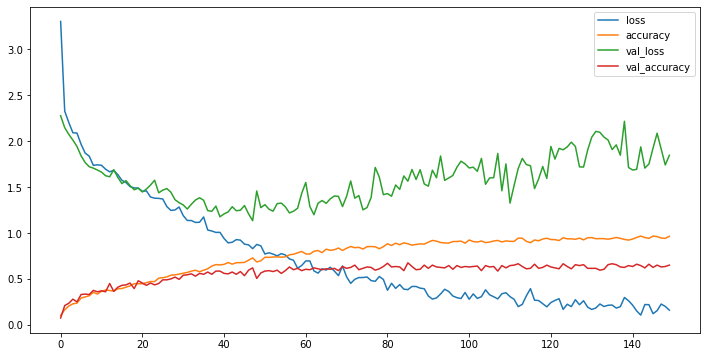

In [68]:
pd.DataFrame(history.history).plot( figsize = (12,6))
plt.show()

In [71]:
filename="Data\genres_original\metal\metal.00009.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label = np.argmax(model.predict(mfccs_scaled_features), axis=-1)
print(predicted_label)
prediction_class = le.inverse_transform(predicted_label) 
prediction_class

[ 3.6384399e+00  1.0475620e+02 -8.3301294e-01  5.5920498e+01
 -2.9229420e+01  3.1247389e+01 -1.4189062e+01  2.0214333e+01
 -8.2728205e+00  1.5177011e+01 -1.4592086e+01  1.5659341e+01
 -1.2991375e+01  1.5278264e+01 -6.9236770e+00  9.8623028e+00
 -6.4960966e+00  4.8992133e+00 -7.7894014e-01  6.4577398e+00
 -5.7189651e+00  2.6487837e+00 -2.0133142e+00  1.2605941e+00
  9.8692536e-01  1.4531208e+00 -2.9697633e+00  3.3619788e-01
 -1.1125596e+00  1.0056968e+00 -3.2323089e+00 -2.0674262e+00
 -3.3654096e+00 -4.5645242e+00 -8.9490843e-01 -2.2216096e+00
 -2.1708629e+00 -1.6652519e+00 -9.2730343e-02 -1.0707006e-01]
[[ 3.6384399e+00  1.0475620e+02 -8.3301294e-01  5.5920498e+01
  -2.9229420e+01  3.1247389e+01 -1.4189062e+01  2.0214333e+01
  -8.2728205e+00  1.5177011e+01 -1.4592086e+01  1.5659341e+01
  -1.2991375e+01  1.5278264e+01 -6.9236770e+00  9.8623028e+00
  -6.4960966e+00  4.8992133e+00 -7.7894014e-01  6.4577398e+00
  -5.7189651e+00  2.6487837e+00 -2.0133142e+00  1.2605941e+00
   9.8692536e-01 

array(['metal'], dtype='<U9')